<a href="https://colab.research.google.com/github/Juanjo1899435/A3_Training_ANN/blob/main/A3_Finalwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3.- Training an Artificial Neural Network on the MNIST dataset.
Instructions.- 
Train an artificial neural network on the MNIST dataset based on the example that we discussed in class (1). 

# A3.- Training an Artificial Neural Network on the MNIST dataset.
Instructions.- 
Train an artificial neural network on the MNIST dataset based on the example that we discussed in class (1). 

Final work.-
Final notebook on colab should have similar structure as we have discussed in class. 
Describe and explain the final results for both train and test sections. 

In [1]:
#A3.- Training an Artificial Neural Network on the MNIST dataset.
#student: Juan Jose Gonzalez Altamirano
#ID: 1899435    Subject: AI     day: Tuesday N3-N6

First we declare our libraries that we are going to use

In [45]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# helping libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


Now, we had to dowload the tousands of images that we are going to work with, the MNIST_handwritten_numbers data import from keras

In [41]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist.npz")

Then, we name the clases of the images so they can be defined as...

In [46]:
class_names = ['Number0', 'Number1', 'Number2', 'Number3', 'Number4',
               'Number5', 'Number6', 'Number7', 'Number8', 'Number9']

Here we are specifying the size of the image (28 x 28 pixels) and how many are used for trainig and for testing our model

In [47]:
train_images.shape

(60000, 28, 28)

This command tells us the number of images we use to train our model

In [48]:
len(train_labels)

60000

In [49]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [50]:
test_images.shape

(10000, 28, 28)

This command tells us the number of images we use to test our model

In [51]:
len(test_labels)

10000

In [53]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Here is shown the third image we use to train the model graphicaly 

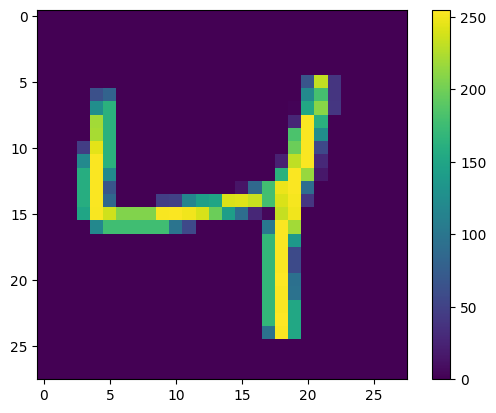

In [54]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

Here ocurs a proces called normalization, instead of having a scale from 1 to any "n" number, we havve a scale from 0 to 1

In [56]:
train_images = train_images / 255.0

test_images = test_images / 255.0

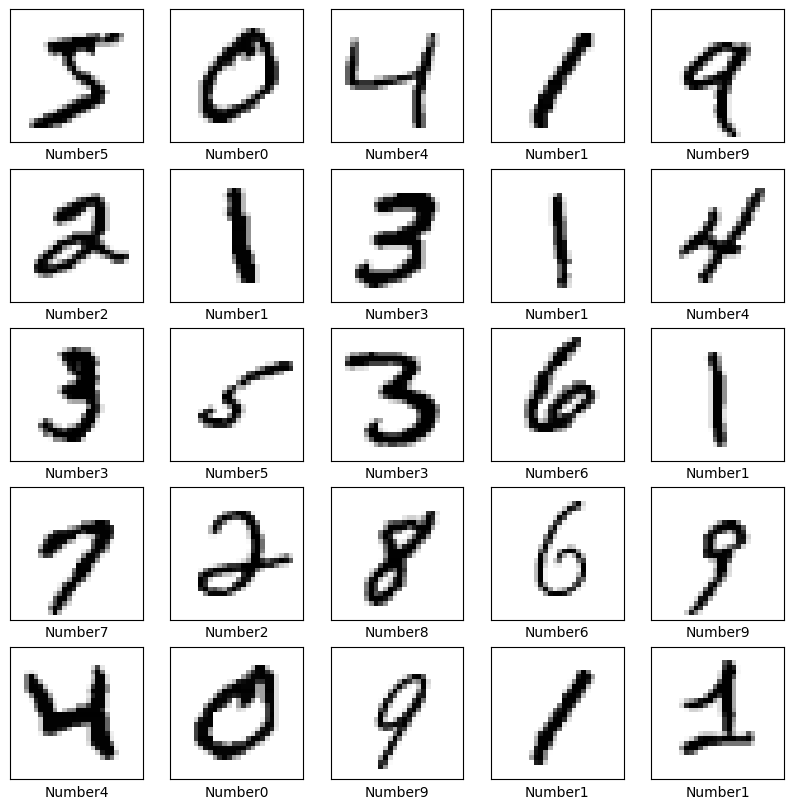

In [57]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Then, we configurate the layers of our ACNN with the specify tipe of layer, the shap of the imput images, the number of neurons in the program analize layer and the output layer

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

This part we train the model, but the diference to the other times, in this case we train it with epocs to show the loss and accuaracy in th model

In [64]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2441 - accuracy: 0.9292
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2354 - accuracy: 0.9320
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2269 - accuracy: 0.9344
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2185 - accuracy: 0.9367
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2101 - accuracy: 0.9390
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2020 - accuracy: 0.9421
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1943 - accuracy: 0.9443
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1869 - accuracy: 0.9467
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1797 - accuracy: 0.9487
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.17

This command show the final accuaracy and loss of the model

In [65]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1758 - accuracy: 0.9495 - 587ms/epoch - 2ms/step

Test accuracy: 0.9495000243186951


Now, the model do its thing predicting the result on the test images to validate if its effective

In [66]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Bellow is the numerical mathematical probabilities that the model think what number is

In [68]:
predictions[2]

array([3.6579847e-06, 9.8852444e-01, 3.9131325e-03, 1.0685321e-03,
       7.9819714e-05, 6.2774209e-04, 1.0241717e-03, 2.4979513e-03,
       2.1622987e-03, 9.8359771e-05], dtype=float32)

In [69]:
np.argmax(predictions[2])

1

In [72]:
test_labels[2]

1

Almost finishing, this comand shows the graphic probability on what our model think what number is on a bar chart

In [73]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

And finally the model gave us a mathematical prediction graphically

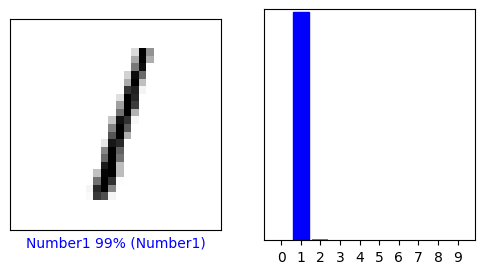

In [75]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

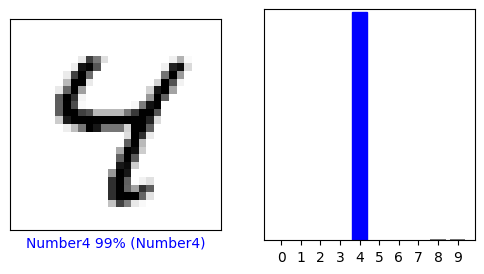

In [77]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

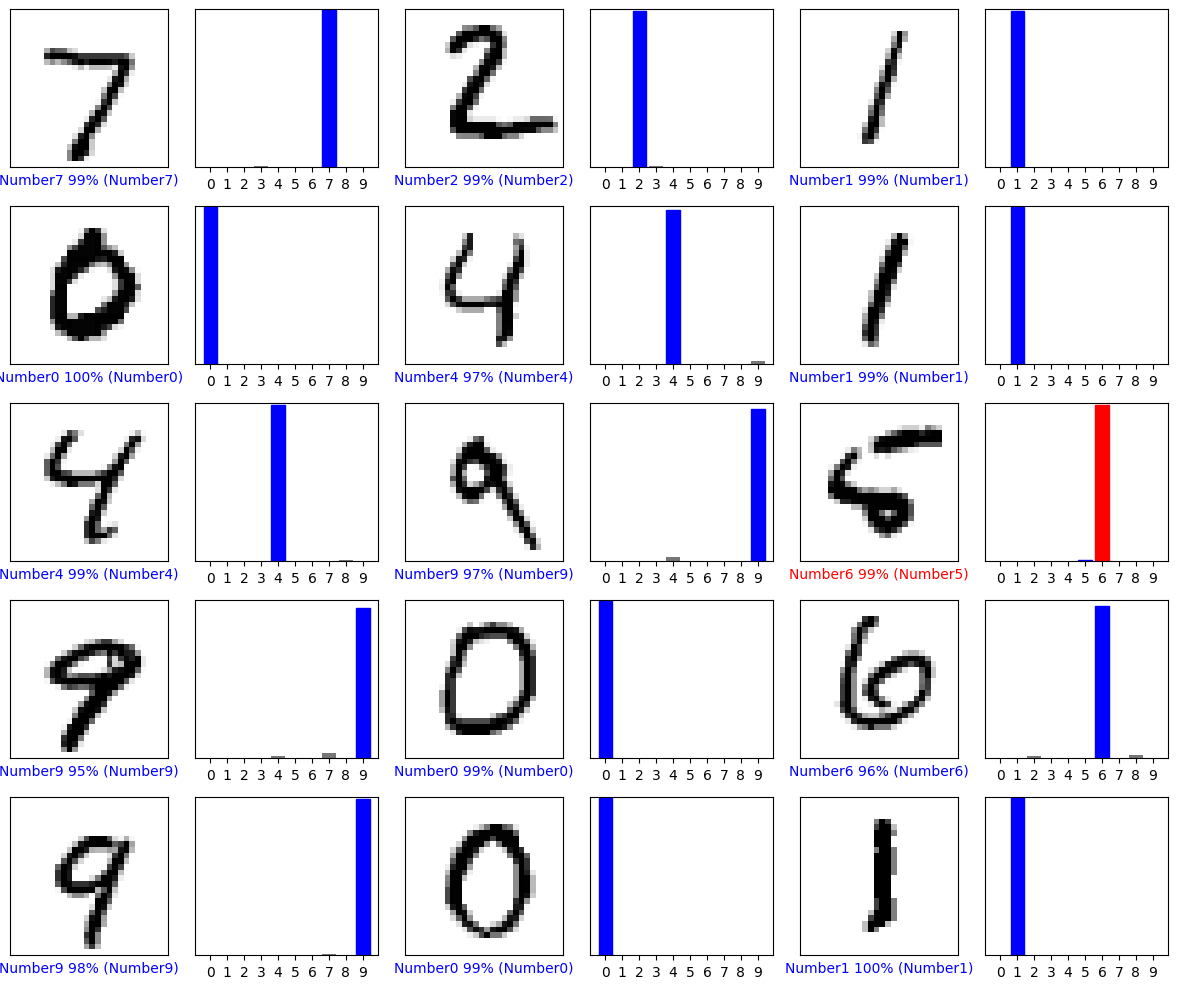

In [78]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [79]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [80]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [81]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [82]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[2.0979969e-03 2.4449550e-05 9.8895174e-01 5.9800264e-03 5.9178926e-13
  2.1232539e-03 2.6682831e-04 1.9374892e-11 5.5576541e-04 4.2601946e-11]]


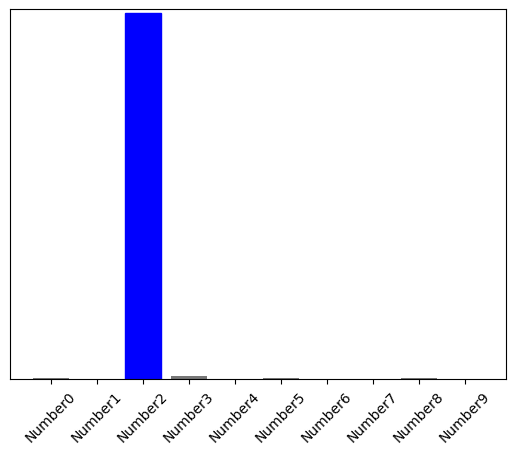

In [83]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [84]:
np.argmax(predictions_single[0])

2